# 6.2 Exploring Relationships

### This script contains the following:

1. Importing Visualization Libraries and Data

2. Data Cleaning

3. Exploring Relationships
  - Correlations
  - Scatterplots
  - Pair Plots
  - Categorical Plots
  
4. Answering Key Questions

#### 1. Importing Visualization Libraries and Data¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# To ensures charts are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\31622\OneDrive\Documents\Career Foundry\Career Foundry\Exercise\Exercise 6\Airline Project'

In [4]:
# Import data

airline_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airline_clean.csv'), index_col = False)

In [5]:
# Check data
airline_clean.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_to_travel,length_of_stay,flight_hour,flight_day,booking_origin,extra_baggage,preferred_seat,in_flight_meals,flight_duration,booking_complete
0,0,1,Internet,RoundTrip,191,2,16,Thu,Afghanistan,0,0,0,4.75,0
1,1,1,Internet,RoundTrip,27,6,2,Thu,Algeria,0,0,1,6.62,0
2,2,1,Mobile,RoundTrip,55,29,16,Mon,Argentina,1,0,0,5.52,0
3,3,1,Internet,RoundTrip,30,18,18,Thu,Argentina,0,1,0,8.58,0
4,4,1,Internet,RoundTrip,30,42,20,Thu,Argentina,0,0,0,8.58,0


In [6]:
#drop column 'unnamed:0'. This is not needed for analysis.
airline_clean = airline_clean.drop(columns = ['Unnamed: 0'])

### Exploring relationships

##### Create a correlation heatmap using seaborn

In [7]:
airline_clean.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_to_travel',
       'length_of_stay', 'flight_hour', 'flight_day', 'booking_origin',
       'extra_baggage', 'preferred_seat', 'in_flight_meals', 'flight_duration',
       'booking_complete'],
      dtype='object')

In [8]:
# Create a subset 

sub = airline_clean[['num_passengers', 'purchase_to_travel', 'length_of_stay', 'flight_hour', 'flight_duration', 'booking_complete']] 
#Subset is chosen for categorical variables excluding binary variables

In [9]:
sub

,num_passengers,purchase_to_travel,length_of_stay,flight_hour,flight_duration,booking_complete
0,1,191,2,16,4.75,0
1,1,27,6,2,6.62,0
2,1,55,29,16,5.52,0
3,1,30,18,18,8.58,0
4,1,30,42,20,8.58,0
...,...,...,...,...,...,...
49913,1,9,6,3,8.83,0
49914,1,11,6,14,8.83,1
49915,1,108,6,13,8.83,0
49916,1,136,6,11,7.42,1


[Text(0, 0.5, 'num_passengers'),
 Text(0, 1.5, 'purchase_to_travel'),
 Text(0, 2.5, 'length_of_stay'),
 Text(0, 3.5, 'flight_hour'),
 Text(0, 4.5, 'flight_duration'),
 Text(0, 5.5, 'booking_complete')]

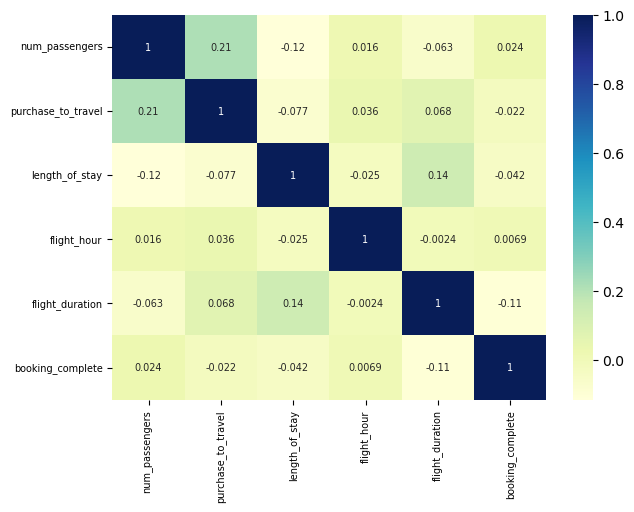

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax, cmap="YlGnBu", annot_kws={"fontsize":7},
              xticklabels=1, yticklabels=1) 

corr.set_xticklabels(corr.get_xticklabels(), fontsize = 7)
corr.set_yticklabels(corr.get_yticklabels(), rotation = 0, fontsize = 7)


# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

**The most significant of our heat map is a weak correlation between the services inflight meals and preferred seat. Outside of the services, the number of passengers, purchase to travel, flight_duration and length_of_stay variables have weak correlations. In the travel industry, this may be interesting to dig deeper into understand whether people consider flying longer if holiday stay is longer. Overall, what this chart tells us is that there is little or no correlation between any of the subset variables in our dataset.** 

In [11]:
#Export heatmap viz
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap.png'))

### Scatterplot

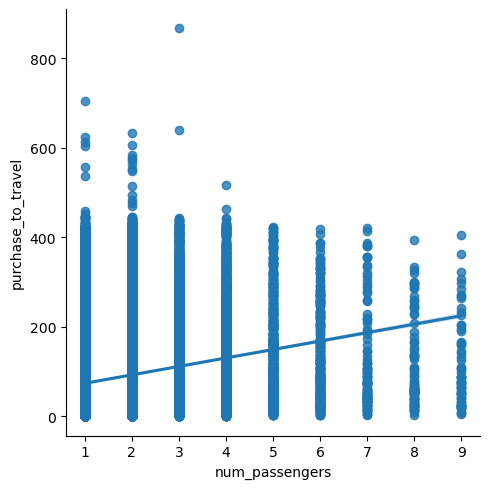

In [12]:
# Create a scatterplot for the "num_passengers" and "purchase_to_travel" columns in seaborn

scatter_1 = sns.lmplot(x = 'num_passengers', y = 'purchase_to_travel', data = airline_clean)

**There is generally a positive relationship between these two variables, with our trend showing that as the number of passengers increases, so does the time between purchase and travel. There are still quite a few outliers that don’t correspond with the trend - with one unit well above 800.** 

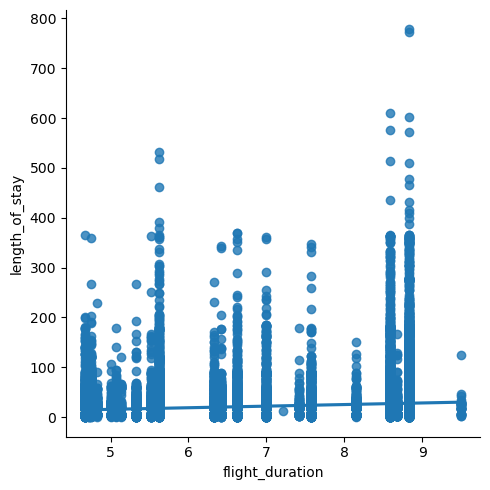

In [13]:
# Check other correlation variables.

# Create a scatterplot for the "flight_duration" and "length_of_stay" columns in seaborn

Scatter_2 = sns.lmplot(x = 'flight_duration', y = 'length_of_stay', data = airline_clean)

**The chart shows a near flat trend line, indicating that there is no relationship between these variables.**

In [14]:
#Export viz
scatter_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'num_passengers_purchase_travel.png'))

In [15]:
#Export viz
Scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'flight_duration_length_stay.png'))

### Pair Plot

In [16]:
airline_clean.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_to_travel',
       'length_of_stay', 'flight_hour', 'flight_day', 'booking_origin',
       'extra_baggage', 'preferred_seat', 'in_flight_meals', 'flight_duration',
       'booking_complete'],
      dtype='object')

In [17]:
# Create a subset

sub_2 = airline_clean[['num_passengers', 'purchase_to_travel', 'length_of_stay', 'flight_hour', 'flight_duration']]

In [18]:
# Keep only the variables you want to use in the pair plot

pair_1 = sub_2[['num_passengers', 'purchase_to_travel', 'length_of_stay', 'flight_hour', 'flight_duration']]

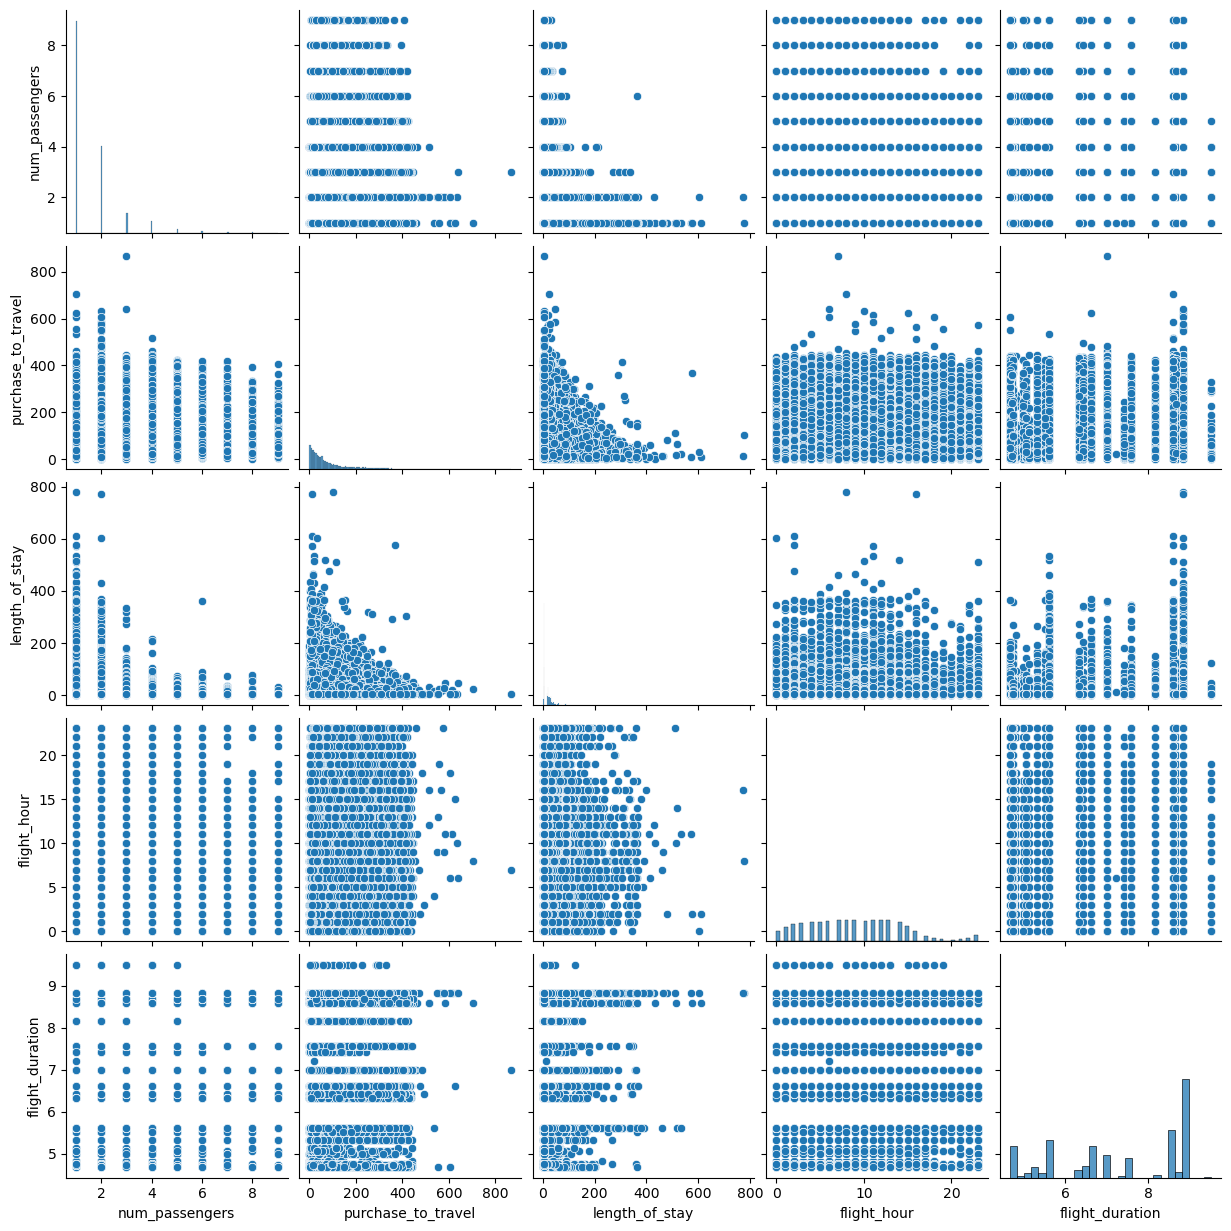

In [19]:
# Create a pair plot of variables in our subset

g = sns.pairplot(pair_1)

**The plot mirrors our earlier observation of the weak strength in the relationship between these variables. What is still of interest is how the length of stay relates to some variables in our data. This perhaps makes sense because decision on how long to stay for a holiday booking depends on a variety of things and further exploration of this variables seems logical as a result.**

###### Categorical variables to explore: 
**length of stay, services, purchase to travel**

In [20]:
#Export viz
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

### Categorical Plot:

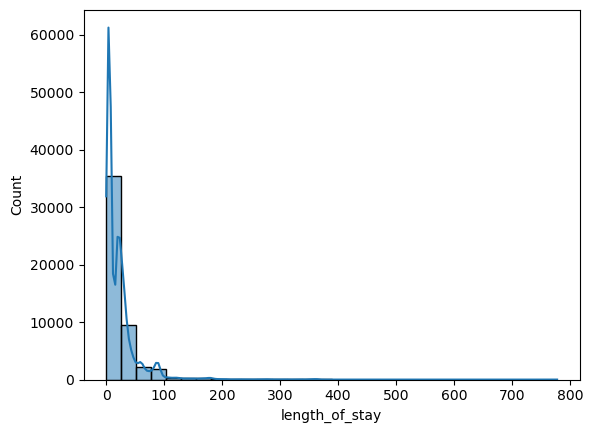

In [21]:
#Create histogram for length of stay variable
hist_1 = sns.histplot(airline_clean['length_of_stay'],bins = 30, kde = True)

In [22]:
#Apply flags
airline_clean.loc[airline_clean['length_of_stay'] < 28, 'holiday_length'] = 'less than a month'

In [23]:
airline_clean.loc[(airline_clean['length_of_stay'] >= 28) & (airline_clean['length_of_stay'] < 180), 'holiday_length'] = 'within six months'

In [24]:
airline_clean.loc[airline_clean['length_of_stay'] >= 180, 'holiday_length'] = 'over six months'

In [25]:
#Check flag count
airline_clean['holiday_length'].value_counts(dropna = False)

less than a month    36751
within six months    12776
over six months        391
Name: holiday_length, dtype: int64

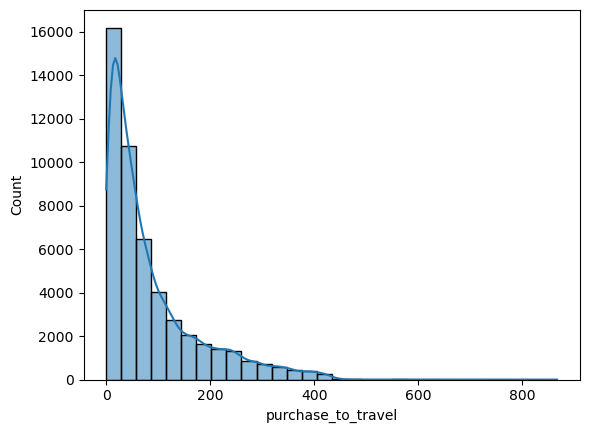

In [26]:
# Create histogram for purchase to travel 
hist_2 = sns.histplot(airline_clean['purchase_to_travel'],bins = 30, kde = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

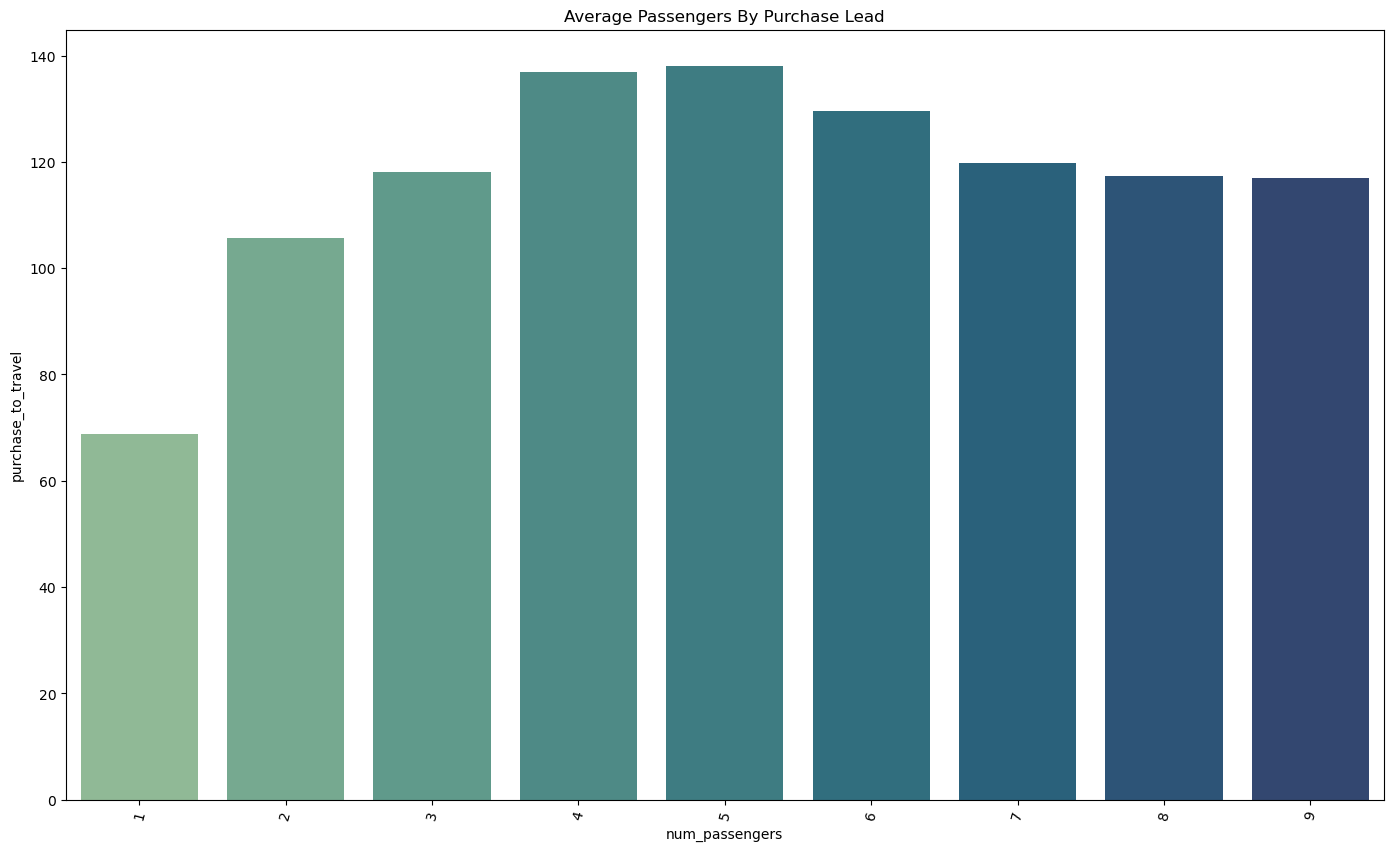

In [27]:
# Number of Passengers by Purchase travel time

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_purchase_lead = airline_clean.groupby('num_passengers')['purchase_to_travel'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_1 = sns.barplot(x ='num_passengers', y = 'purchase_to_travel', data = passengers_purchase_lead,
                 palette = 'crest')
plt.title("Average Passengers By Purchase Lead")
plt.xticks(rotation = 75)


**This chart tells us that on average, when the number of people in a booking is large, there is a longer wait between purchase and travel.** 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

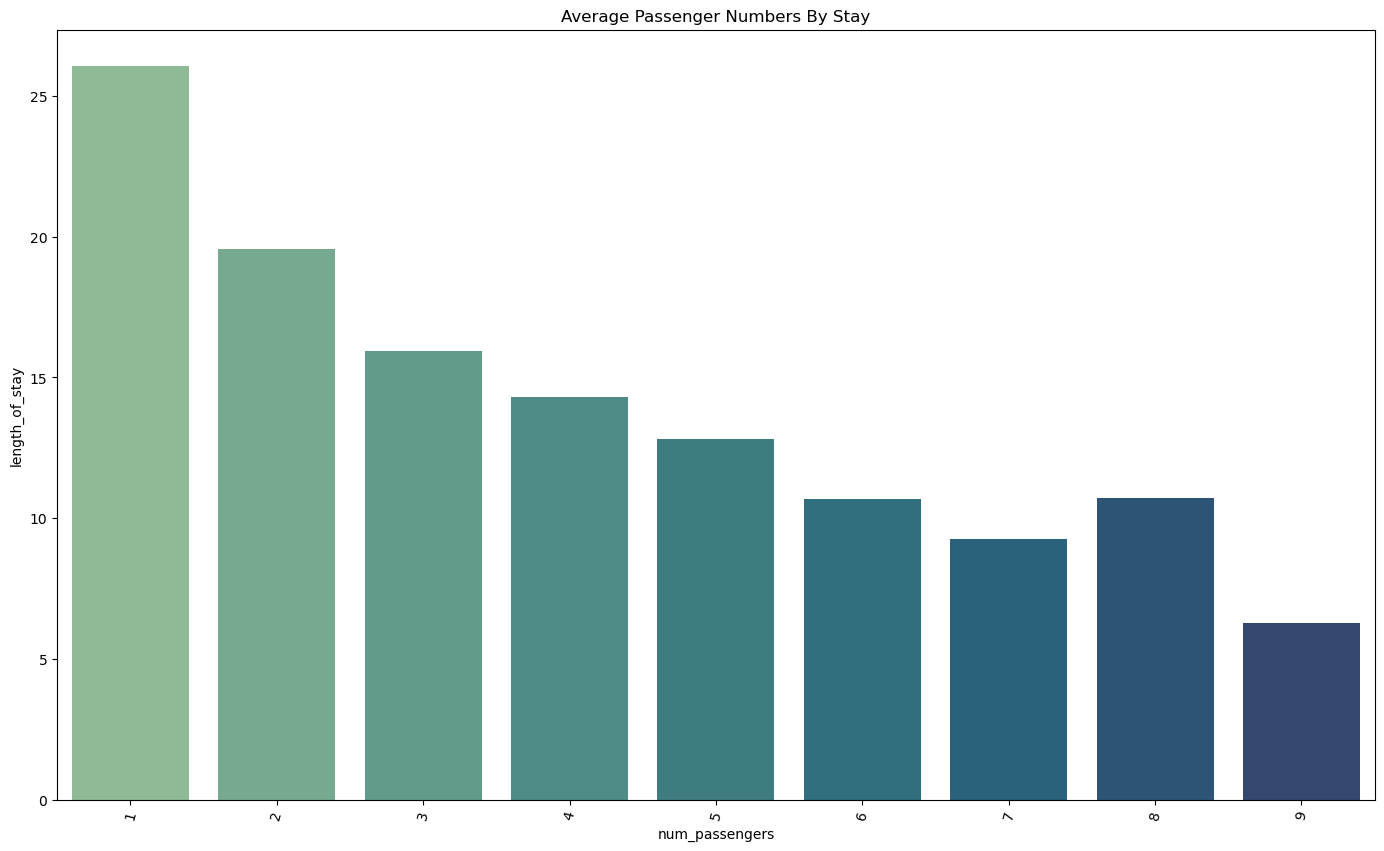

In [28]:
# Number of Passengers by length of stay

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_purchase_lead = airline_clean.groupby('num_passengers')['length_of_stay'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_2 = sns.barplot(x ='num_passengers', y = 'length_of_stay', data = passengers_purchase_lead,
                 palette = 'crest')
plt.title("Average Passenger Numbers By Stay")
plt.xticks(rotation = 75)

**This chart shows the average length of stay against number of passengers. It shows that as the number of passengers increases, the length of stay decreases.**

In [29]:
# Create flag for purchase to travel
airline_clean.loc[airline_clean['purchase_to_travel'] < 180, 'Waiting_to_travel'] = 'Six month wait'

In [30]:
airline_clean.loc[(airline_clean['purchase_to_travel'] >= 180) & (airline_clean['purchase_to_travel'] < 365), 'Waiting_to_travel'] = 'Almost Year wait'

In [31]:
airline_clean.loc[airline_clean['purchase_to_travel'] >= 365, 'Waiting_to_travel'] = 'Over year wait'

In [32]:
#Check flag count
airline_clean['Waiting_to_travel'].value_counts(dropna = False)

Six month wait      42653
Almost Year wait     6415
Over year wait        850
Name: Waiting_to_travel, dtype: int64

Text(0.5, 1.0, 'Frequency Booking to Travel')

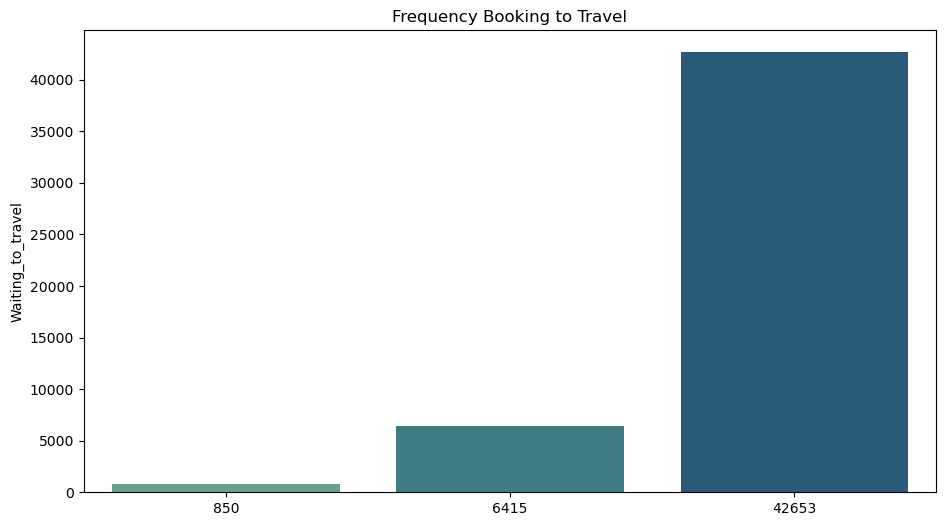

In [33]:
# Create bar chart for waiting to travel
plt.figure(figsize = (11,6))
temp = airline_clean.Waiting_to_travel.value_counts().head()
bar_3 = sns.barplot(data = temp, x = temp.values, y = temp.index, palette = 'crest')
plt.title("Frequency Booking to Travel")

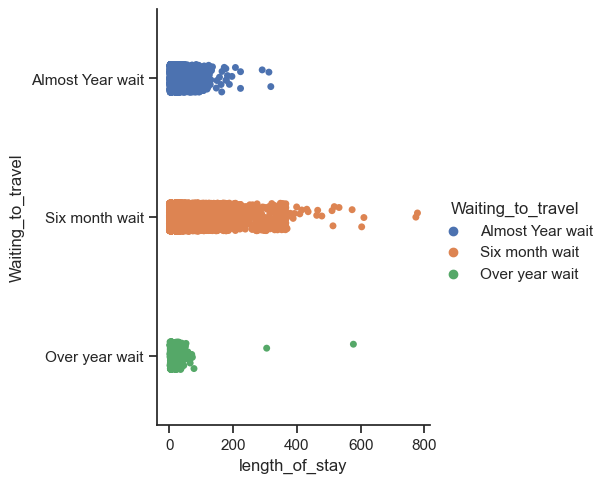

In [34]:
# Create a categorical plot in seaborn using the length of stay categories created above

sns.set(style="ticks")
cat_2 = sns.catplot(x="length_of_stay", y="Waiting_to_travel", hue="Waiting_to_travel", data=airline_clean)

**Our chart shows that there are more people waiting for about 6 months to travel, as well as staying longer on holiday.**

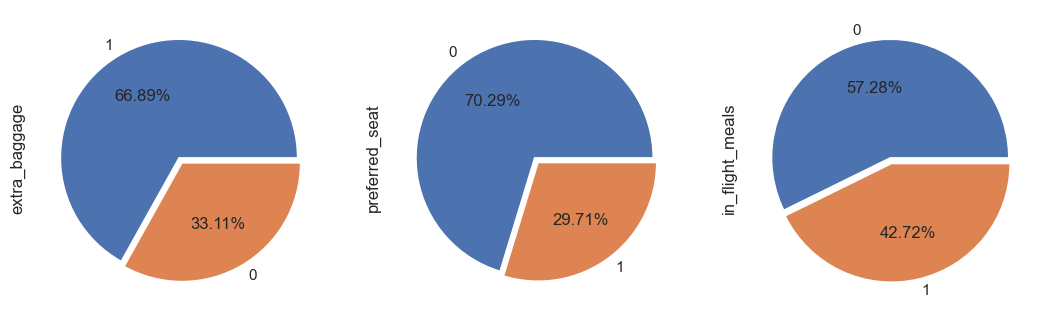

In [35]:
# Create pie chart for service features - extra_baggage, preferred_seat, in_flight_meals
pie_1 = plt.figure(figsize = (13, 7))
binary_cols = ['extra_baggage', 'preferred_seat','in_flight_meals']
for i, col in enumerate(binary_cols):
    plt.subplot(1,3,i+1)
    airline_clean[col].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0, 0.05])

In [36]:
#Export viz
pie_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Services.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'RoundTrip'), Text(1, 0, 'OneWay'), Text(2, 0, 'CircleTrip')])

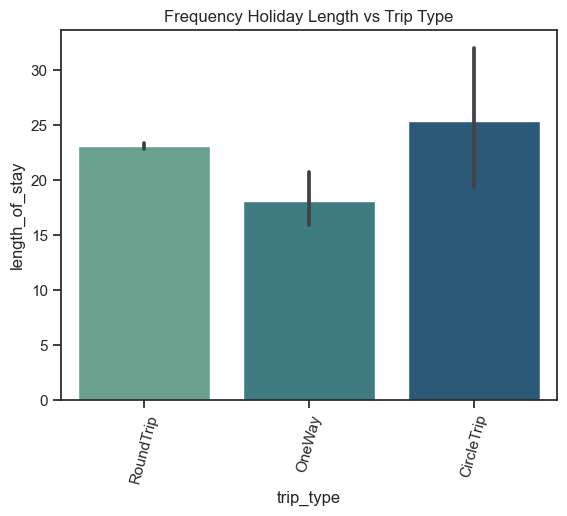

In [37]:
sns.barplot(x ='trip_type', y = 'length_of_stay', data = airline_clean,
                 palette = 'crest')
plt.title("Frequency Holiday Length vs Trip Type")
plt.xticks(rotation = 75)

**It appears the most popular trip type is circle considered against length of stay**

(array([0, 1, 2]),
 [Text(0, 0, 'OneWay'), Text(1, 0, 'RoundTrip'), Text(2, 0, 'CircleTrip')])

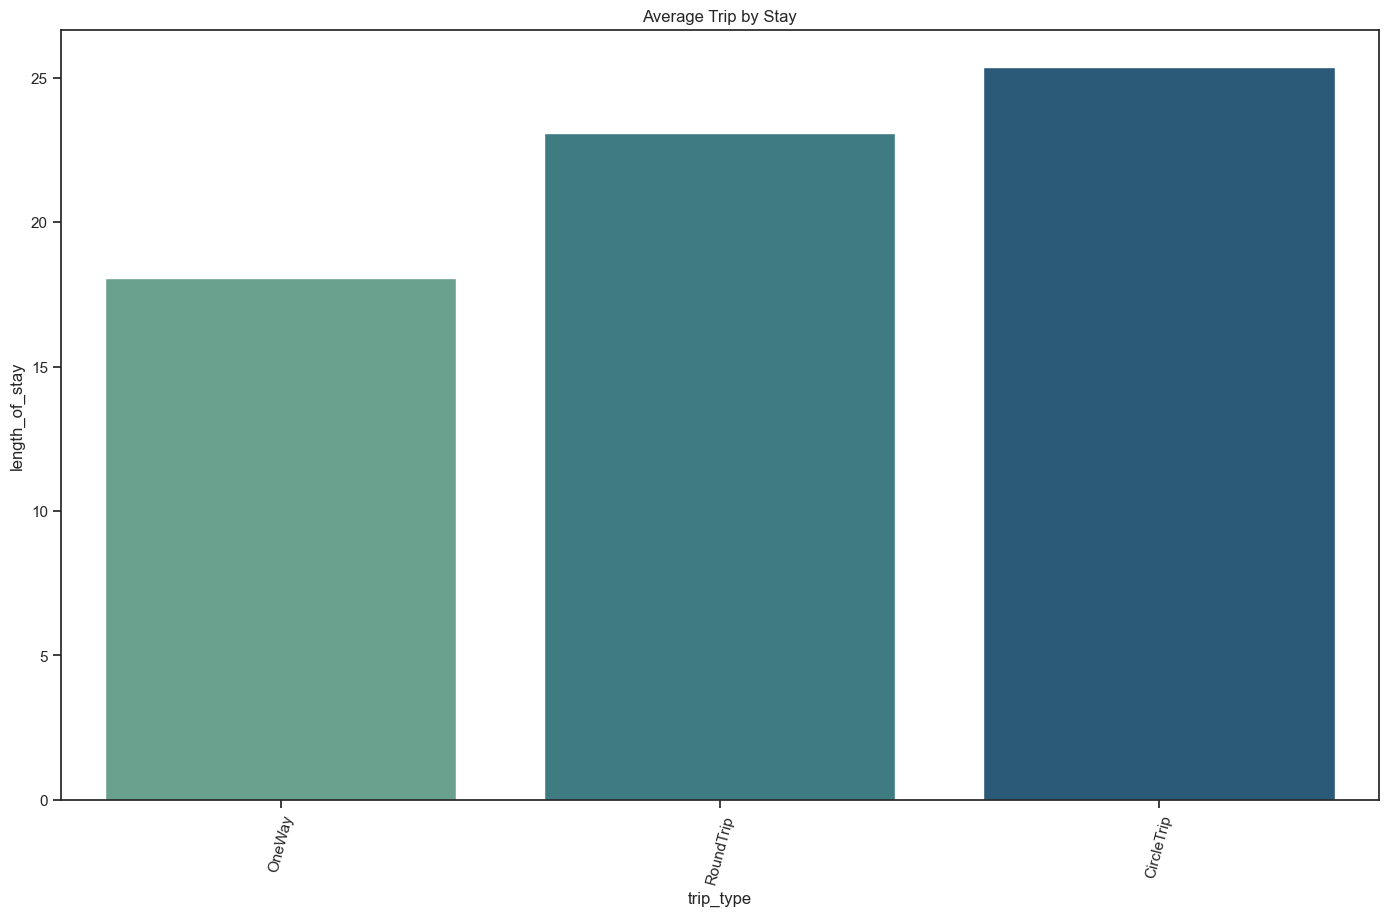

In [38]:
# Number of Passengers by length of stay

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_purchase_lead = airline_clean.groupby('trip_type')['length_of_stay'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_4 = sns.barplot(x ='trip_type', y = 'length_of_stay', data = passengers_purchase_lead,
                 palette = 'crest')
plt.title("Average Trip by Stay")
plt.xticks(rotation = 75)

**The most popular trip type by average length of stay is Circle trip.

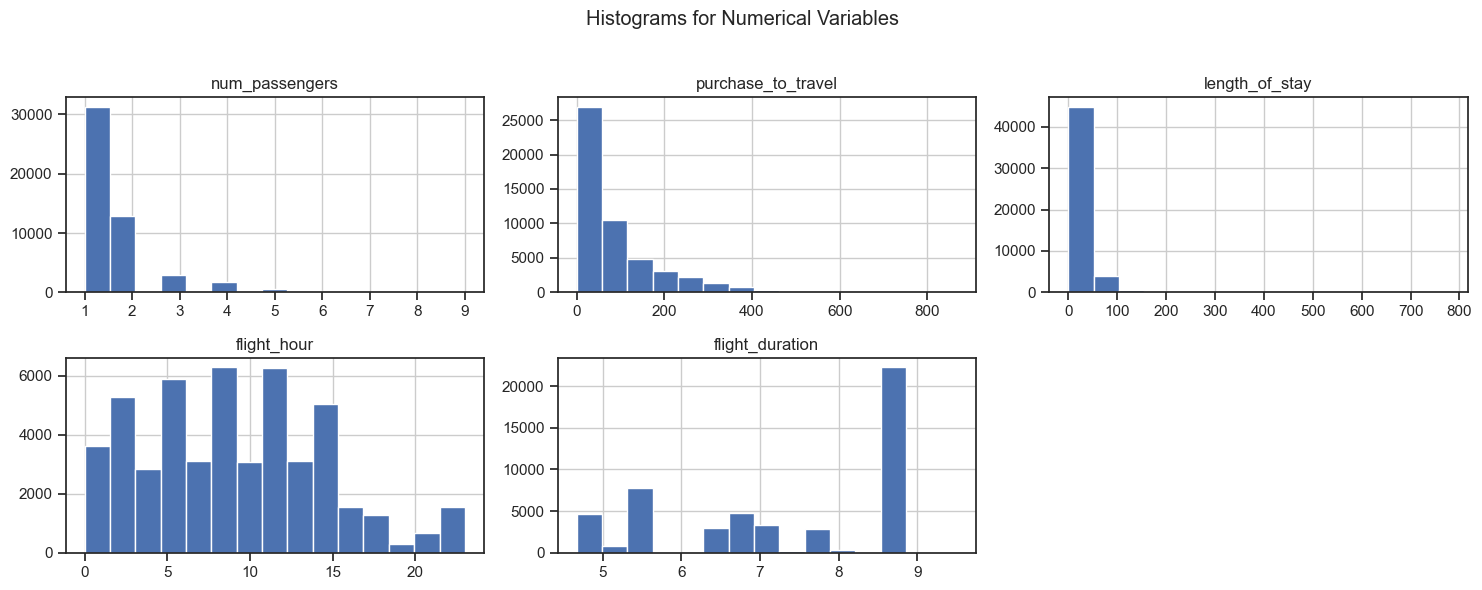

In [39]:
# Plot histograms for numerical variables
numerical_cols = ['num_passengers', 'purchase_to_travel', 'length_of_stay', 'flight_hour', 'flight_duration']
airline_clean[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms for Numerical Variables')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

(array([0, 1]), [Text(0, 0, 'Mobile'), Text(1, 0, 'Internet')])

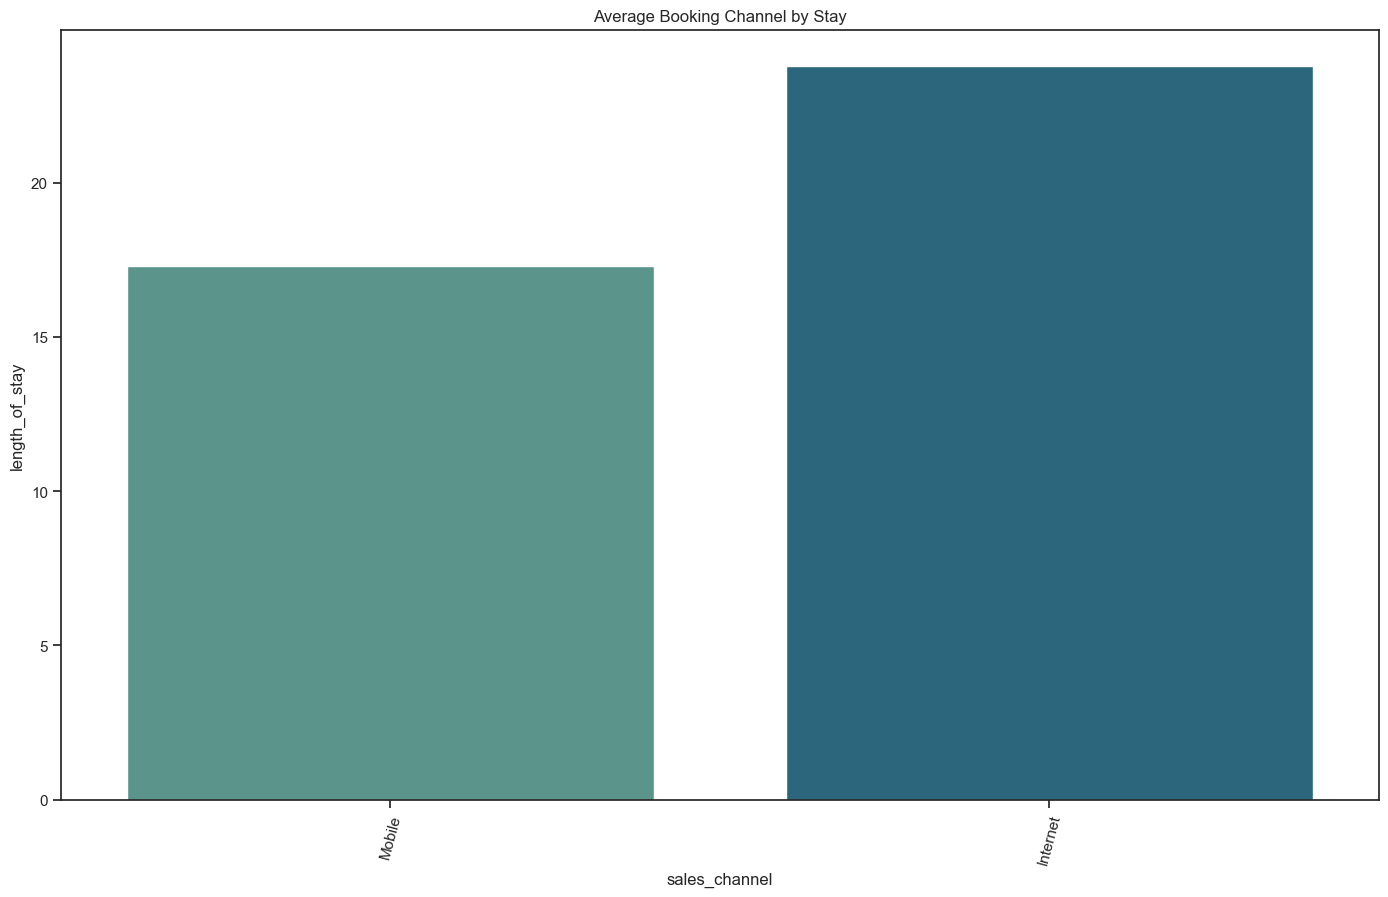

In [40]:
# Number of Passengers by length of stay

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_purchase_lead = airline_clean.groupby('sales_channel')['length_of_stay'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_5 = sns.barplot(x ='sales_channel', y = 'length_of_stay', data = passengers_purchase_lead,
                 palette = 'crest')
plt.title("Average Booking Channel by Stay")
plt.xticks(rotation = 75)

**More people book with the internet to stay longer on holiday than with their mobile.**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Sat'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Tue'),
  Text(6, 0, 'Thu')])

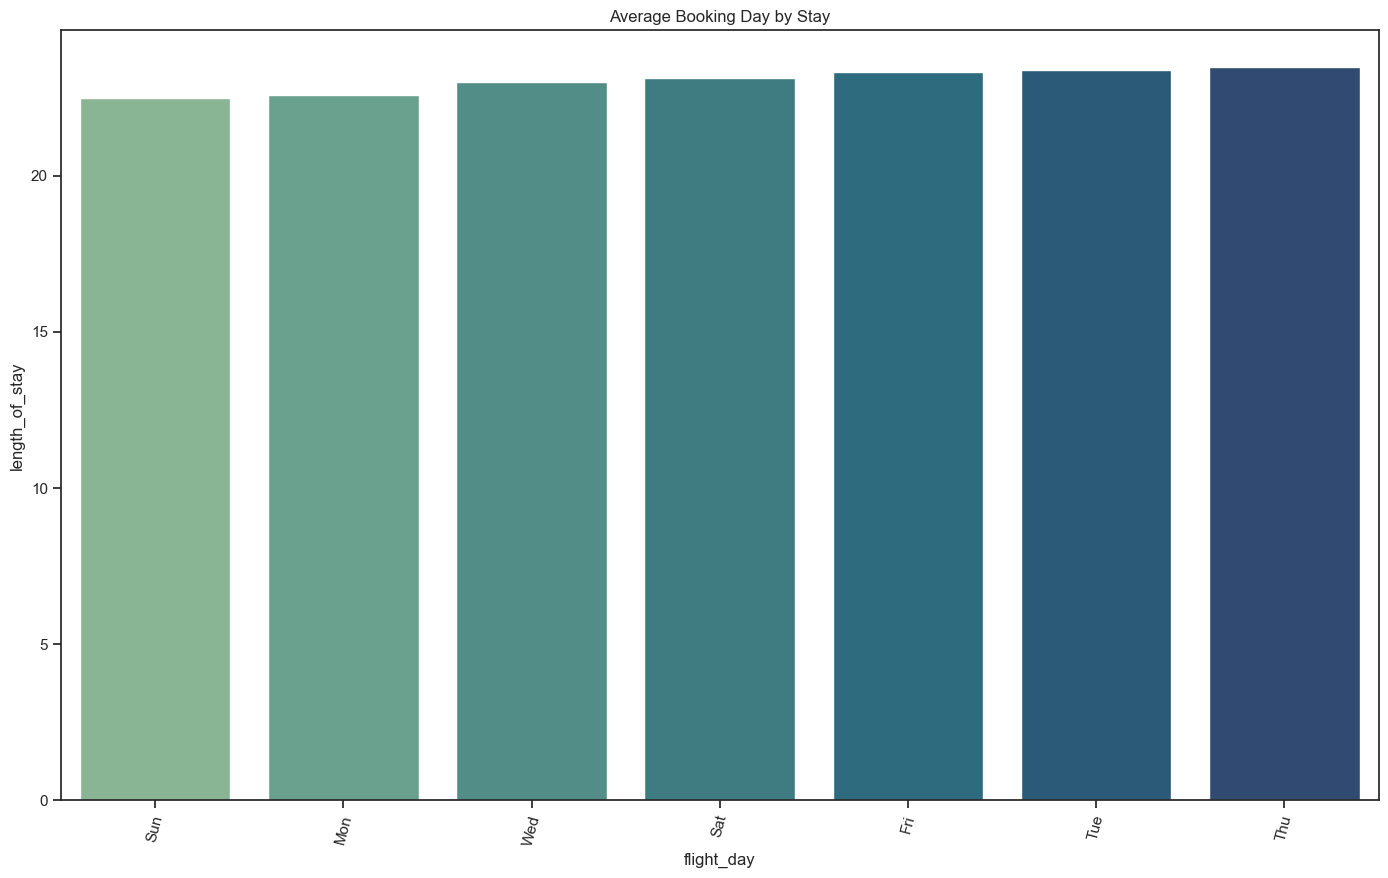

In [41]:
# Number of Passengers by length of stay

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_purchase_lead = airline_clean.groupby('flight_day')['length_of_stay'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_6 = sns.barplot(x ='flight_day', y = 'length_of_stay', data = passengers_purchase_lead,
                 palette = 'crest')
plt.title("Average Booking Day by Stay")
plt.xticks(rotation = 75)

**Observations: There is a slight increase in booking for longer holiday stays at the end of the week, than the beginning.** 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

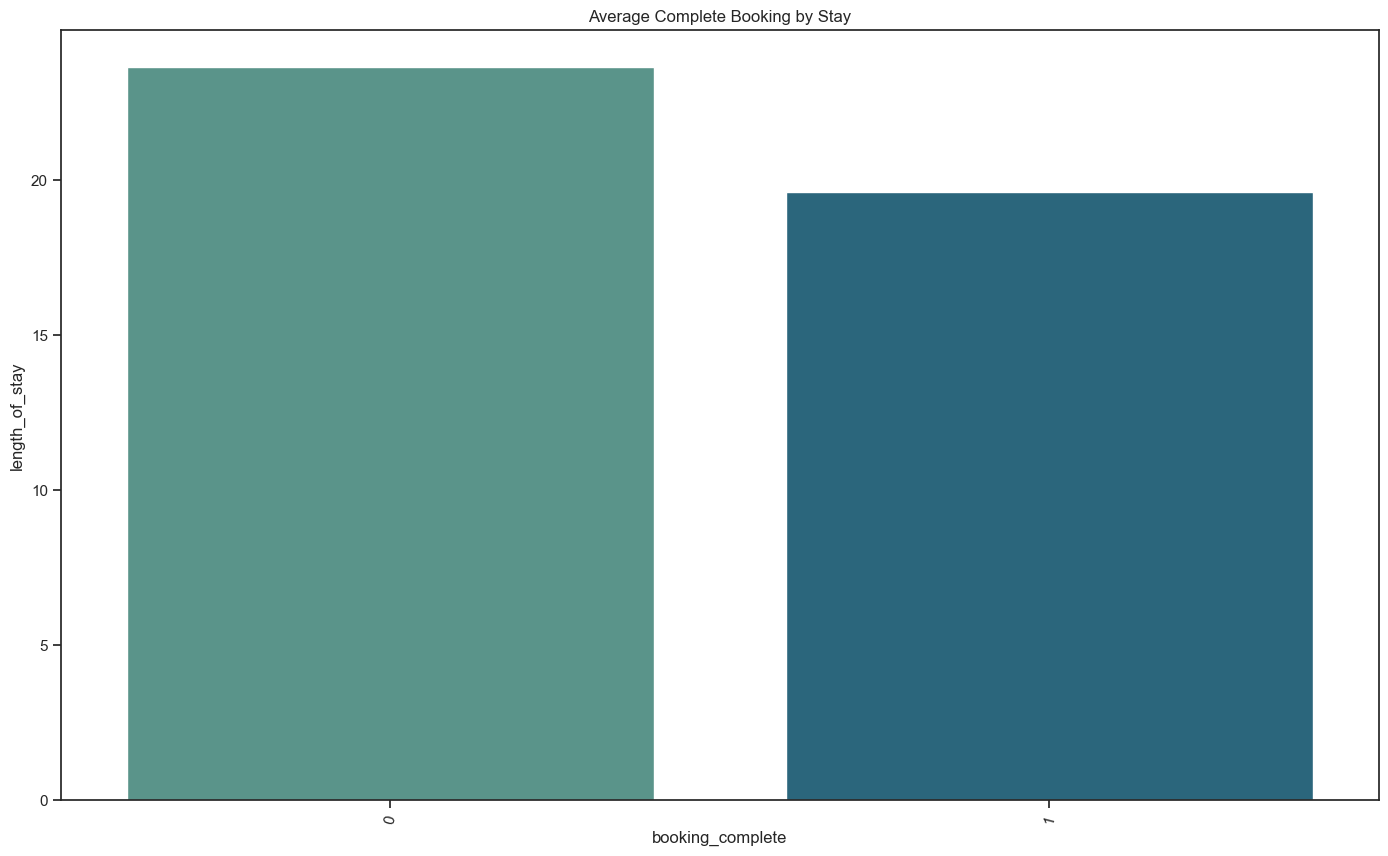

In [42]:
# Number of Passengers by length of stay

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by the type of boat and the mean value in euro
passengers_purchase_lead = airline_clean.groupby('booking_complete')['length_of_stay'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
bar_7 = sns.barplot(x ='booking_complete', y = 'length_of_stay', data = passengers_purchase_lead,
                 palette = 'crest')
plt.title("Average Complete Booking by Stay")
plt.xticks(rotation = 75)

Observations: There are more people that do not complete their booking than do

In [43]:
#Export viz
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'length of stay.png'))

In [44]:
#Export viz
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'purchase to travel.png'))

In [45]:
#Export viz
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Passengers by Purchase lead.png'))

In [46]:
#Export viz
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Passengers by Stay.png'))

In [47]:
#Export viz
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Booking to travel.png'))

In [48]:
#Export viz
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Booking to travel.png'))

In [49]:
#Export viz
bar_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Booking Channel by Stay.png'))

In [50]:
#Export viz
bar_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Booking to travel.png'))

In [51]:
#Export viz
cat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Booking Day by Stay.png'))

## 7. Information gained from analysis

### The larger the number of passengers, the more time between booking and travel
### Number of passengers increases as length of stay decreases.**
### More people wait for about 6 months to travel, as well as staying longer on holiday.
### Most popular trip type is circle 
### Booking for longer holiday happens at the end of the week


##  8. Hyphothesis

### 1. Larger number of travelling group prefer to book and travel later. 
### 2. Larger travelling group prefer shorter trips
### 3. The longer passengers wait to travel, the longer the length of stay
### 4. The type of trips has an impact on the type of booking services
### 5. Desination country affects choice of services 